<a href="https://colab.research.google.com/github/INA-95/beer_data_analysis/blob/main/beer_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Mount Drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [32]:
# library

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from seaborn import heatmap

In [3]:
# import Dataset

file_path = '/content/drive/MyDrive/Side Project/Side_Project/Beer Data Analysis/datasets/datasets/BeerDataScienceProject.tar.bz2'
df = pd.read_csv(file_path, compression = "bz2")
df.head()

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time
0,5.0,47986,10325,Sausa Weizen,Hefeweizen,2.5,2.0,1.5,1.5,stcules,1.5,A lot of foam. But a lot. In the smell some ba...,1234817823
1,6.2,48213,10325,Red Moon,English Strong Ale,3.0,2.5,3.0,3.0,stcules,3.0,"Dark red color, light beige foam, average. In ...",1235915097
2,6.5,48215,10325,Black Horse Black Beer,Foreign / Export Stout,3.0,2.5,3.0,3.0,stcules,3.0,"Almost totally black. Beige foam, quite compac...",1235916604
3,5.0,47969,10325,Sausa Pils,German Pilsener,3.5,3.0,3.0,2.5,stcules,3.0,"Golden yellow color. White, compact foam, quit...",1234725145
4,7.7,64883,1075,Cauldron DIPA,American Double / Imperial IPA,4.0,4.5,4.0,4.0,johnmichaelsen,4.5,"According to the website, the style for the Ca...",1293735206



### 1.Rank the top 3 breweries which produce the strongest beers

In [4]:
def top_n_breweries_by_ABS(n:int):
    breweries_and_ABV = df[['beer_ABV', 'beer_beerId', 'beer_brewerId']].groupby('beer_brewerId')['beer_ABV'].mean().sort_values(ascending = False).reset_index()
    breweries_and_ABV['rank'] = breweries_and_ABV['beer_ABV'].rank(method = 'dense', ascending = False)
    result = breweries_and_ABV[breweries_and_ABV['rank'] <= n]
    return result

In [5]:
top_n_breweries_by_ABS(3)

,beer_brewerId,beer_ABV,rank
0,6513,19.228824,1.0
1,736,13.750000,2.0
2,24215,12.466667,3.0


### 2. Which year did beers enjoy the highest ratings?

In [6]:
def convert_int_to_date(df:pd.DataFrame, col:str):
    datetime = pd.to_datetime(df[col], unit = 's')
    res = datetime.dt.year
    return res

In [7]:
df['year'] = convert_int_to_date(df,'review_time')
df['year'].head()

0    2009
1    2009
2    2009
3    2009
4    2010
Name: year, dtype: int64

In [8]:
df['ratings'] = df['review_appearance'] + df['review_palette'] + df['review_overall'] + df['review_taste'] + df['review_aroma']
df.groupby('year')['ratings'].sum().sort_values(ascending = False).head(1)

year
2011    2119537.0
Name: ratings, dtype: float64

In [13]:
year_overall_review = df[['year', 'review_overall']]
total_num_of_reviews = year_overall_review.groupby('year').count().reset_index().rename(columns = {'review_overall':'total_num_of_reviews'})
mean_review_overall = year_overall_review.groupby('year')['review_overall'].mean().reset_index().rename(columns = {'review_overall':'mean_review_overall'})
res = pd.merge(total_num_of_reviews, mean_review_overall, how = 'inner')
res

,year,total_num_of_reviews,mean_review_overall
0,1998,23,3.891304
1,1999,25,4.000000
2,2000,33,4.181818
3,2001,602,3.927741
4,2002,7581,3.798905
5,2003,18187,3.752900
6,2004,22905,3.794630
7,2005,29433,3.832042
8,2006,43083,3.798192
9,2007,46514,3.809552


In [17]:
res = res.set_index('year')

Text(0, 0.5, 'mean_review_overall')

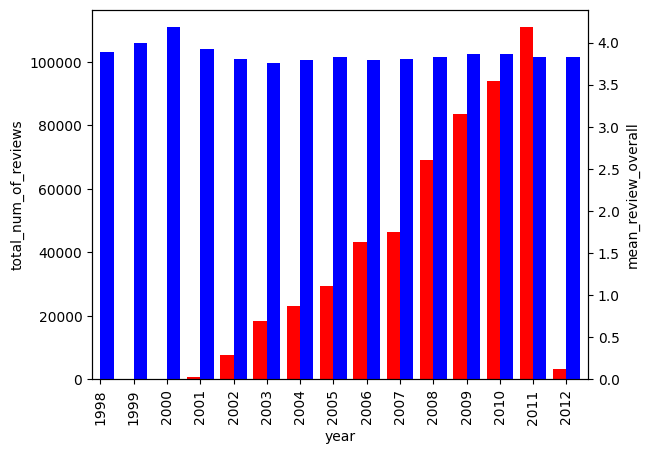

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax2 = ax.twinx()

width = 0.4

res.total_num_of_reviews.plot(kind = 'bar', color = 'red', ax = ax, width = width, position = 1)
res.mean_review_overall.plot(kind = 'bar', color = 'blue', ax = ax2, width = width, position = 0)

ax.set_ylabel('total_num_of_reviews')
ax2.set_ylabel('mean_review_overall')

### 3. Based on the users' ratings, which factors are important among taste, aroma, appearance and palette?

In [28]:
# review overall과의 연관성

def correlation(col1:str, col2:str):
    if len(df[col1]) == len(df[col2]):

        sum_col1_col2 = sum((df[col1] - df[col1].mean()) - (df[col2] - df[col2].mean()))
        sum_col1_squared = sum(df[col1] - df[col1].mean()**2)
        sum_col2_squared = sum(df[col2] - df[col2].mean()**2)
        corr = sum_col1_col2 / np.sqrt(sum_col1_squared * sum_col2_squared)
        return corr

528870
528870


In [30]:
correlation('review_overall', 'review_palette')

2.236332955418899e-15

In [31]:
df.corr(method = 'pearson')

<ipython-input-31-3a995beae43c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method = 'pearson')


,beer_ABV,beer_beerId,beer_brewerId,review_appearance,review_palette,review_overall,review_taste,review_aroma,review_time,year,ratings
beer_ABV,1.000000,0.218097,0.078540,0.252577,0.319468,0.119603,0.269182,0.271716,0.143451,0.145108,0.293237
beer_beerId,0.218097,1.000000,0.462537,0.050345,0.061283,-0.010388,0.036456,0.015569,0.462993,0.459316,0.035404
beer_brewerId,0.078540,0.462537,1.000000,-0.008476,0.013062,-0.016511,-0.005957,-0.013141,0.244962,0.241397,-0.007503
review_appearance,0.252577,0.050345,-0.008476,1.000000,0.547691,0.486687,0.554775,0.534244,0.053290,0.054289,0.731936
review_palette,0.319468,0.061283,0.013062,0.547691,1.000000,0.601971,0.604271,0.706156,0.058557,0.058763,0.828818
review_overall,0.119603,-0.010388,-0.016511,0.486687,0.601971,1.000000,0.692454,0.783002,0.024381,0.025550,0.859500
review_taste,0.269182,0.036456,-0.005957,0.554775,0.604271,0.692454,1.000000,0.725273,0.051711,0.052820,0.855491
review_aroma,0.271716,0.015569,-0.013141,0.534244,0.706156,0.783002,0.725273,1.000000,0.036998,0.037958,0.903141
review_time,0.143451,0.462993,0.244962,0.053290,0.058557,0.024381,0.051711,0.036998,1.000000,0.992498,0.053070
year,0.145108,0.459316,0.241397,0.054289,0.058763,0.025550,0.052820,0.037958,0.992498,1.000000,0.054128
